In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import json
import random
dict = []
for i in range(1,6,1):
    file_path = 'drive/MyDrive/webscience/data/datajson/geoLondonSep2022_{}.json'.format(i)

    with open(file_path, 'r') as file:
        tweets_data = json.load(file)
    dict.extend(tweets_data)


print(json.dumps(dict[0], indent=4, ensure_ascii=False))
print(len(dict))


{
    "_id": 1565429028747616256,
    "date": {
        "$date": "2022-09-01T19:58:59Z"
    },
    "screen_name": "loststoryart",
    "qualityScore": 0.5543859649122808,
    "text": "Just posted a photo @ London, United Kingdom https://t.co/WmczYM5N4H",
    "url": "https://t.co/Ejo6POjL2A",
    "description": "Artist/Dreamer",
    "listed_count": 0,
    "user_created": {
        "$date": "2014-09-06T16:58:45Z"
    },
    "geo_enabled": true,
    "favourites_count": 12,
    "coordinates": [
        -0.1094,
        51.5141
    ],
    "location": "London, England",
    "followers_count": 105,
    " friends_count": 105,
    "place_name": "City of London, London",
    "place_country": "United Kingdom",
    "country_code": "GB",
    "place_coordinates": [
        [
            [
                -0.112442,
                51.5068
            ],
            [
                -0.0733794,
                51.5068
            ],
            [
                -0.0733794,
                51.522161


In [3]:
import math

sw_corner_lat, sw_corner_lon = 51.2867602, -0.5103751
ne_corner_lat, ne_corner_lon = 51.6918741, 0.3340155

num_grids_lat = int((ne_corner_lat - sw_corner_lat) * 110.574)
num_grids_lon = int((ne_corner_lon - sw_corner_lon) * 111.320 * math.cos(math.radians(sw_corner_lat)))

grid_map = {}
for tweet in dict:
    if 'coordinates' in tweet and tweet['coordinates']:
        lon, lat = tweet['coordinates']
        grid_x = int((lon - sw_corner_lon) * 111.320 * math.cos(math.radians(sw_corner_lat)))
        grid_y = int((lat - sw_corner_lat) * 110.574)
        if (grid_x, grid_y) not in grid_map:
            grid_map[(grid_x, grid_y)] = []
        grid_map[(grid_x, grid_y)].append(tweet['_id'])

count = 0

print(len(grid_map))

for grid, tweet_ids in grid_map.items():
    print(f"netID: {grid}, TweetID: {tweet_ids}")
    count += 1
    if count >=5:
        break


193
netID: (27, 25), TweetID: [1565429028747616256, 1565428982660603907, 1565425981246115842, 1565423227639369730, 1565419410856230913, 1565419277062180865, 1565417944825434115, 1565416855665524737, 1565414386441015297, 1565414068848332800, 1565413313428836359, 1565412220179255297, 1565410840605786112, 1565410335342960640, 1565410074251694080, 1565409871809363974, 1565409255662190592, 1565407424055590912, 1565406834206605312, 1565405568428277761, 1565405555707248640, 1565402642154651655, 1565401698335686663, 1565401594887557120, 1565400957336403968, 1565397291808493569, 1565391248860528642, 1565388485863043072, 1565388439029252102, 1565386869231190017, 1565385138640404486, 1565384898646532100, 1565384573210574848, 1565384183488385025, 1565383779769794560, 1565376042860449792, 1565375536784113664, 1565373713465413635, 1565371094424584193, 1565369730483064838, 1565368733920534529, 1565367674535821314, 1565366040128897025, 1565365865188626432, 1565365754630995968, 1565363671018209283, 156

In [4]:
count_60 = 0
count_50 = 0
count_40 = 0
count_30 = 0
count_20 = 0
count_10 = 0
count_100 = 0
count_125 = 0
count_150 = 0
count_200 = 0
for grid, tweet_ids in grid_map.items():
  a = len(tweet_ids)
  if a < 60:
    count_60 += 1
  if a < 50:
    count_50 += 1
  if a < 40:
    count_40 += 1
  if a < 30:
    count_30 += 1
  if a < 20:
    count_20 += 1
  if a < 10:
    count_10 += 1
  if a>100:
    count_100 += 1
  if a>125:
    count_125 += 1
  if a>150:
    count_150 += 1
  if a>200:
    count_200 += 1

print(f"Count < 60: {count_60 / 193}")
print(f"Count < 50: {count_50 / 193}")
print(f"Count < 40: {count_40 / 193}")
print(f"Count < 30: {count_30 / 193}")
print(f"Count < 20: {count_20 / 193}")
print(f"Count < 10: {count_10 / 193}")

print(f"Count > 100: {count_100 / 193}")
print(f"Count > 125: {count_125 / 193}")
print(f"Count > 150: {count_150 / 193}")
print(f"Count > 200: {count_200 / 193}")

Count < 60: 0.8031088082901554
Count < 50: 0.7772020725388601
Count < 40: 0.7305699481865285
Count < 30: 0.6735751295336787
Count < 20: 0.616580310880829
Count < 10: 0.47150259067357514
Count > 100: 0.11398963730569948
Count > 125: 0.08808290155440414
Count > 150: 0.07253886010362694
Count > 200: 0.05181347150259067


In [5]:
import spacy
from collections import Counter
from collections import defaultdict
import math
import re

nlp = spacy.load("en_core_web_sm")

def preprocess_text_spacy(text):
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'[\t\n]+', ' ', text)
    doc = nlp(text)
    cleaned_tokens = []
    for token in doc:
        if not token.is_stop and not token.is_punct and token.is_alpha:
            cleaned_token = token.lemma_.strip()
            cleaned_token = re.sub(r'\s+', ' ', cleaned_token)
            if cleaned_token:
                cleaned_tokens.append(cleaned_token)
    return cleaned_tokens

tweet_id_to_text = {tweet["_id"]: tweet["text"] for tweet in dict}


tf_values = defaultdict(list)
doc_freq = Counter()
total_docs = sum(len(tweet_ids) for tweet_ids in grid_map.values())

for grid, tweet_ids in grid_map.items():
    for tweet_id in tweet_ids:
        tweet_text = tweet_id_to_text.get(tweet_id)
        if tweet_text:
            tokens = preprocess_text_spacy(tweet_text)
            tf = Counter(tokens)
            tf_values[grid].append(tf)
            doc_freq.update(set(tokens))

idf_values = {word: math.log((total_docs + 1) / (freq + 1)) + 1 for word, freq in doc_freq.items()}

tf_idf_values = {}
for grid, tfs in tf_values.items():
    grid_tf_idf = []
    for tf in tfs:
        tf_idf = {word: (tf[word] * idf_values[word]) for word in tf}
        grid_tf_idf.append(tf_idf)
    tf_idf_values[grid] = grid_tf_idf


In [6]:
for grid, tweet_ids in tf_idf_values.items():
    print(f"netID: {grid}, TF-IDF: {tweet_ids}")
    count += 1
    if count >=5:
        break

netID: (27, 25), TF-IDF: [{'post': 1.8875631068489314, 'photo': 1.8785812849417156, 'London': 1.5712039331622976, 'United': 2.1694313873369055, 'Kingdom': 2.0419593210215394}, {'post': 1.8875631068489314, 'photo': 1.8785812849417156, 'London': 1.5712039331622976, 'United': 2.1694313873369055, 'Kingdom': 2.0419593210215394}, {'fun': 6.210775545867722, 'day': 4.706698149091447, 'murder': 9.101147303763886, 'London': 3.142407866324595, 'Town': 7.351947448954627, 'time': 5.058096035929336, 'age': 7.714852942643995, 'OrganiseEvents': 9.794294484323832, 'United': 2.1694313873369055, 'Kingdom': 2.0419593210215394}, {'stockpile': 9.794294484323832, 'energy': 7.92249230742224, 'great': 4.922921257561083, 'idea': 7.5970699069876115, 'London': 1.5712039331622976, 'United': 2.1694313873369055, 'Kingdom': 2.0419593210215394}, {'post': 1.8875631068489314, 'photo': 1.8785812849417156, 'London': 1.5712039331622976, 'United': 2.1694313873369055, 'Kingdom': 2.0419593210215394}, {'post': 1.88756310684893

In [7]:
import numpy as np
global_vocabulary = set(word for grid_tfs in tf_values.values() for tweet_tf in grid_tfs for word in tweet_tf)

global_idf = {word: math.log((total_docs + 1) / (freq + 1)) + 1 for word, freq in doc_freq.items() if word in global_vocabulary}

new_tweet_vector = np.zeros(len(global_vocabulary))
vocab_to_index = {word: i for i, word in enumerate(global_vocabulary)}

print(list(global_vocabulary)[:10])
print({k: global_idf[k] for k in list(global_vocabulary)[:10]})


['Nikon', 'fast', 'Cocktails', 'Savoy', 'pizzaexpressliveholborn', 'LIVEME', 'TV', 'contain', 'Kebab', 'nettle']
{'Nikon': 9.794294484323832, 'fast': 8.40800012320394, 'Cocktails': 9.388829376215668, 'Savoy': 8.40800012320394, 'pizzaexpressliveholborn': 9.794294484323832, 'LIVEME': 9.794294484323832, 'TV': 9.794294484323832, 'contain': 9.101147303763886, 'Kebab': 9.794294484323832, 'nettle': 9.794294484323832}


In [8]:

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

def most_similar_grid_find(new_tweet_text):
    new_tweet_vector = np.zeros(len(global_vocabulary))
    new_tweet_tokens = preprocess_text_spacy(new_tweet_text)
    new_tweet_tf = Counter(new_tweet_tokens)
    for word, count in new_tweet_tf.items():
      if word in global_idf:
          index = vocab_to_index[word]
          tf_idf_value = count * global_idf[word]
          new_tweet_vector[index] = tf_idf_value

    new_tweet_vector_sparse = csr_matrix(new_tweet_vector)

    similarity_scores = {}
    for grid, tf_idf_list in tf_idf_values.items():
        grid_vector = np.zeros(len(global_vocabulary))
        for word, tf_idf_value in tf_idf_list[0].items():
            if word in vocab_to_index:
                grid_vector[vocab_to_index[word]] = tf_idf_value
        grid_vector_sparse = csr_matrix(grid_vector)
        score = cosine_similarity(new_tweet_vector_sparse, grid_vector_sparse)[0][0]
        similarity_scores[grid] = score
    grid_tweet_counts = {grid: len(tweet_ids) for grid, tweet_ids in grid_map.items()}
    total_tweets = sum(grid_tweet_counts.values())
    grid_weights = {grid: count*100 / total_tweets for grid, count in grid_tweet_counts.items()}
    adjusted_similarity_scores = {grid: similarity_scores[grid] * grid_weights.get(grid, 0) for grid in similarity_scores}
    most_similar_grid = max(similarity_scores, key=similarity_scores.get)
    print(f'predict {most_similar_grid}', end=" ")


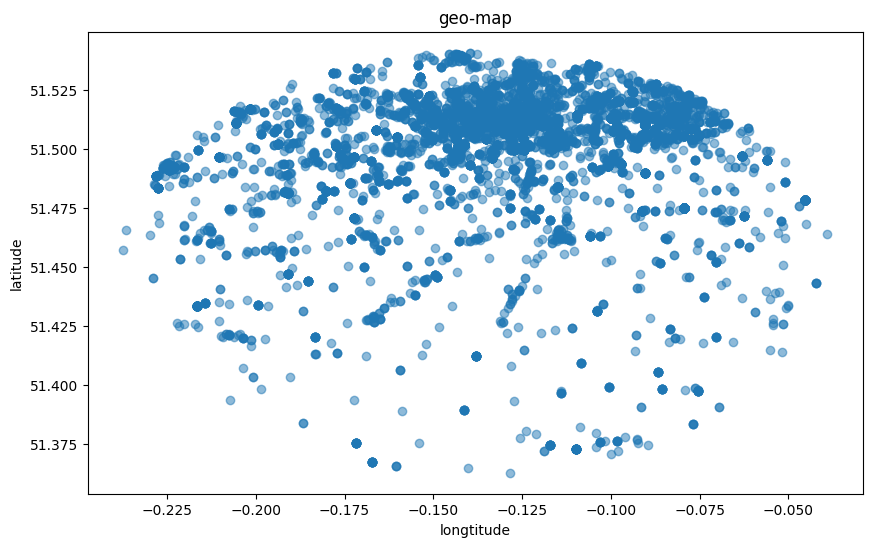

In [9]:
import matplotlib.pyplot as plt

coordinates_list = [(tweet['coordinates'][0], tweet['coordinates'][1]) for tweet in dict if tweet['coordinates']]

lons, lats = zip(*coordinates_list)

plt.figure(figsize=(10, 6))
plt.scatter(lons, lats, alpha=0.5)
plt.title('geo-map')
plt.xlabel('longtitude')
plt.ylabel('latitude')
plt.show()


In [10]:
grid_top_words = []
for grid, tf_idf_list in tf_idf_values.items():
    word_scores = defaultdict(float)
    for tf_idf in tf_idf_list:
        for word, score in tf_idf.items():
            word_scores[word] += score
    top_word = max(word_scores, key=word_scores.get)
    grid_top_words.append({
        'grid': grid,
        'top_word': top_word,
        'score': word_scores[top_word],
        'tweet_count': len(grid_map[grid])
    })
    print(f"The net {grid} has the toppest word is: {top_word}，with score: {word_scores[top_word]}，and total tweets are: {len(grid_map[grid])}")


The net (27, 25) has the toppest word is: United，with score: 8534.543077783168，and total tweets are: 4342
The net (24, 25) has the toppest word is: Marylebone，with score: 228.3950497857209，and total tweets are: 132
The net (30, 20) has the toppest word is: Unιted，with score: 2325.163228565415，and total tweets are: 618
The net (28, 15) has the toppest word is: Otter，with score: 108.91148049294192，and total tweets are: 13
The net (27, 24) has the toppest word is: Southbank，with score: 308.1139535114943，and total tweets are: 250
The net (25, 26) has the toppest word is: Orrery，with score: 129.1501884187894，and total tweets are: 86
The net (26, 25) has the toppest word is: Soho，with score: 333.4184257180059，and total tweets are: 389
The net (25, 24) has the toppest word is: Green，with score: 418.3548488471925，and total tweets are: 327
The net (22, 21) has the toppest word is: Chelsea，with score: 191.60422382571235，and total tweets are: 106
The net (23, 25) has the toppest word is: Paddingt

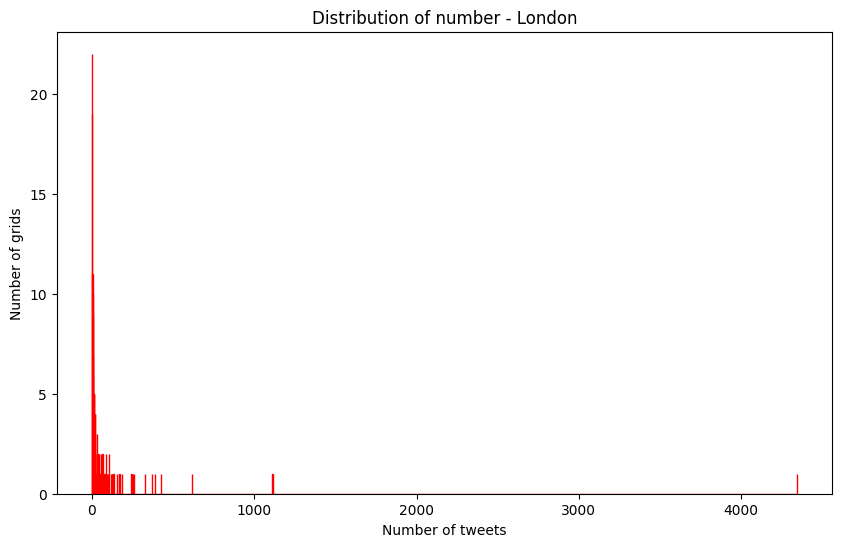

In [11]:
tweets_per_grid = [len(tweet_ids) for tweet_ids in grid_map.values()]
plt.figure(figsize=(10, 6))
plt.hist(tweets_per_grid, bins=range(1, max(tweets_per_grid)+1), color='blue', edgecolor='red')
plt.title('Distribution of number - London')
plt.xlabel('Number of tweets')
plt.ylabel('Number of grids')
plt.show()


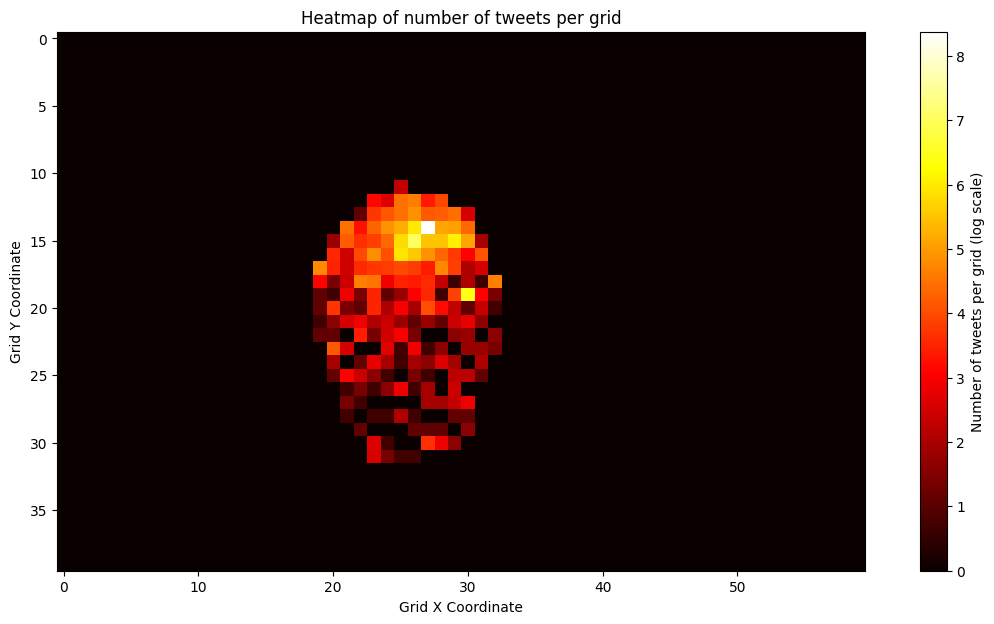

In [18]:
import numpy as np

grid_size_x = 60
grid_size_y = 40
grid_array = np.zeros((grid_size_y, grid_size_x))

for (x, y), tweet_ids in grid_map.items():
  grid_array[y,x] = len(tweet_ids)

grid_array = np.log1p(grid_array)

plt.figure(figsize=(14, 7))
plt.imshow(grid_array[::-1], cmap='hot', interpolation='nearest')
plt.colorbar(label='Number of tweets per grid (log scale)')
plt.title('Heatmap of number of tweets per grid')
plt.xlabel('Grid X Coordinate')
plt.ylabel('Grid Y Coordinate')
plt.show()


In [13]:
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
total_tweets = sum(len(tweet_ids) for tweet_ids in grid_map.values())
print(f"Total Tweets: {total_tweets}")

def calculate_grid_center_switch(grid):
  t = calculate_grid_center(grid)
  return t[1]-0.0045,t[0]-0.0071

adjusted_coordinates_list = [(lat, lon) for lon, lat in coordinates_list]
if adjusted_coordinates_list:
    map_center = [adjusted_coordinates_list[0][0], adjusted_coordinates_list[0][1]]
else:
    map_center = [0, 0]

m = folium.Map(location=map_center, zoom_start=6)

# for (grid_x, grid_y), tweet_ids in grid_map.items():
#     center_lat = sw_corner_lat + (grid_y + 0.5) / 110.574
#     center_lon = sw_corner_lon + (grid_x + 0.5) / (111.320 * math.cos(math.radians(sw_corner_lat)))
#     folium.Marker(
#         [center_lat, center_lon],
#         icon=folium.DivIcon(html=f"""<div style="font-size: 8pt; color: blue;">({grid_x},{grid_y})</div>""")
#     ).add_to(m)

# for item in grid_top_words:
#     grid_center = calculate_grid_center_switch(item['grid'])
#     pstr = f"{item['top_word']} \n {item['tweet_count']}"
#     marker = folium.Marker(
#         location=grid_center,
#         popup=f"{item['top_word']} \n {item['tweet_count']}",
#         # icon=folium.Icon(icon='info-sign')
#         icon=folium.DivIcon(html=f"""<div style="font-size: 8pt; color: blue;">{pstr}</div>""")
#     )
#     marker.add_to(m)

for (grid_x, grid_y) in grid_map.keys():
    bottom_left = [sw_corner_lat + grid_y / 110.574, sw_corner_lon + grid_x / (111.320 * math.cos(math.radians(sw_corner_lat)))]
    bottom_right = [bottom_left[0], bottom_left[1] + 1 / (111.320 * math.cos(math.radians(sw_corner_lat)))]
    top_left = [bottom_left[0] + 1 / 110.574, bottom_left[1]]
    top_right = [top_left[0], bottom_right[1]]
    folium.PolyLine([bottom_left, bottom_right, top_right, top_left, bottom_left], color="blue", weight=1).add_to(m)


HeatMap(adjusted_coordinates_list).add_to(m)

m


Total Tweets: 13192
